# 2.5 Automatic Differentiation

2.5.6 Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?
   
   To compute the first derivative, chain rule is applied on the function in question. The first derivative is the product of various partial derivatives chained together. Now, to calculate the second derivative, we need to apply the chain rule on the the result, which can grow very quickly in terms of the computation required.

2. After running the function for backpropagation, immediately run it again and see what happens. Investigate.

In [1]:
import torch
from d2l import torch as d2l

In [2]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * x @ x
y.backward(retain_graph=True) # if we didn't specify retain_graph=True in the first backward call, the second backward call will invoke an error
print(x.grad == 4 * x)
# the grad will accumulate
y.backward()
print(x.grad == 8 * x)

tensor([True, True, True, True])
tensor([True, True, True, True])


3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or a matrix? At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

In [3]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.arange(10.0, requires_grad=True) #RuntimeError: Only Tensors of floating point and complex dtype can require gradients
d = f(a)
d.sum().backward()
a.grad == d / a # for a_i = 0, d_i = 0, 0/0doesn;t exist
# print(d/a)

a = torch.randn((10, 10), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([[ True,  True,  True,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True, False,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False,  True,  True],
        [ True,  True, False,  True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True, False, False,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True, False,  True,  True,  True]])

when the variable a is a vector or a matrix, the gradient of f(a) w.r.t a is still equivalent to d / a

4. Let $f(x) = sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = cos(x)$ but rather use automatic differentiation to get the result.

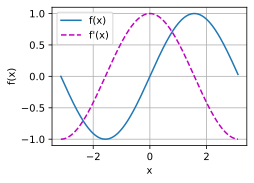

In [4]:
x = torch.arange(-torch.pi, torch.pi, torch.pi/100, requires_grad=True)
f_x = torch.sin(x)
f_x.sum().backward()
d2l.plot(x.detach().numpy(), [f_x.detach().numpy(), x.grad.detach().numpy()], 'x', 'f(x)', legend=['f(x)', 'f\'(x)'])

5 and 6

<img src="./2p5_56.jpeg" width = "600" height = "720" alt="2p5_56"/>

8. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.
   


[Back Propagation(梯度反向传播) 实例讲解](https://zhuanlan.zhihu.com/p/40378224)

Normally we'll first use the forward differentiation and then backward differentiation, because the backward process can exploit the results of the forward process. 